In [1]:
import sys
sys.path.append('../src')
from Mapping import *
sys.path.append('../src/prediction')
from PCA import *

import pickle
import matplotlib
import matplotlib.pyplot as plt

In [2]:
V5 = pickle.load(open('../data/V5.p','rb'))
cp_list = V5["cp_list"]
active_L_table_slide_DOA = V5["active_L_table_slide_DOA"]
active_L_table_slide_matrix = V5["active_L_table_slide_matrix"]
active_long_table_slide_DOA = V5["active_long_table_slide_DOA"]
active_long_table_slide_matrix = V5["active_long_table_slide_matrix"]

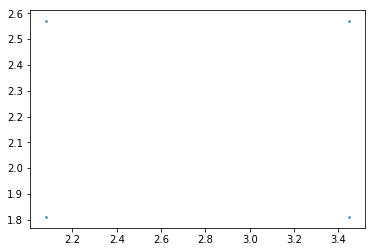

In [3]:
room_x = [i[0] for i in ROOM_COORDINATES[:4]]
room_y = [i[1] for i in ROOM_COORDINATES[:4]]
plt.scatter(room_x, room_y, s=2)

In [4]:
import torch
import torch.nn as nn
import random

In [22]:
input_size = 15
output_size = 2
hidden_size = 20
num_epochs = 2
learning_rate = 0.001

In [6]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = torch.nn.ReLU()
        self.l2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        output = self.l1(x)
        output = self.relu(output)
        output = self.l2(output)
        return output
    

In [23]:
model = NeuralNet(input_size, hidden_size, output_size)
model = model.float()

In [24]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [25]:
# first four are table coordinates
cp_torch = [torch.from_numpy(cp) for cp in cp_list[:4]]
room_coords = [torch.from_numpy(np.array([i[0], i[1]])) for i in ROOM_COORDINATES[:4]]

In [26]:
X = cp_torch
y = room_coords

In [27]:
for i in range(10000):
    for x_i, y_i in zip(X, y):
    
        outputs = model(x_i.float())
        loss = criterion(outputs, y_i.float())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
#         print(loss.item())

In [28]:
maps_train = []
for i in cp_list[:4]:
    testI = torch.from_numpy(i)
    prediction = model(testI.float()).tolist()
    maps_train.append(prediction)

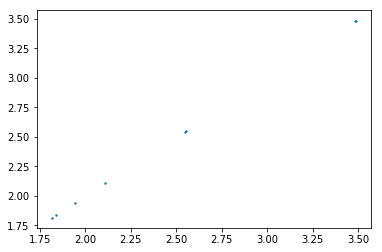

In [29]:
mapX_train = [x[0] for x in maps_train]
mapy_train = [x[1] for x in maps_train]
plt.scatter(mapX_train, mapy_train, s=2)

In [30]:
maps = []
for i in active_L_table_slide_DOA:
    testI = torch.from_numpy(i)
    prediction = model(testI.float()).tolist()
    maps.append(prediction)

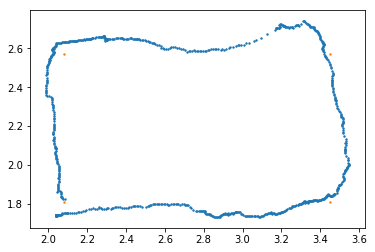

In [31]:
mapX = [x[0] for x in maps]
mapy = [x[1] for x in maps]
plt.scatter(mapX, mapy, s=2)
plt.scatter(room_x, room_y, s=2)

In [32]:
l_maps = []
for i in active_long_table_slide_DOA:
    testI = torch.from_numpy(i)
    prediction = model(testI.float()).tolist()
    l_maps.append(prediction)

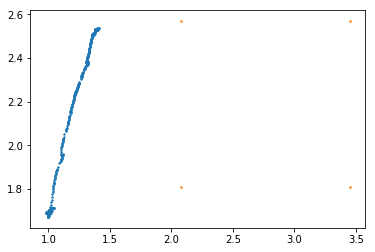

In [33]:
mapX_l = [x[0] for x in l_maps]
mapy_l = [x[1] for x in l_maps]
plt.scatter(mapX_l, mapy_l, s=2)
plt.scatter(room_x, room_y, s=2)

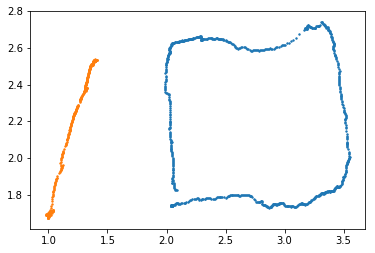

In [34]:
plt.scatter(mapX, mapy, s=2)
plt.scatter(mapX_l, mapy_l, s=2)

In [19]:
maps = []
for i in active_L_table_slide_DOA:
    testI = torch.from_numpy(i)
    prediction = model(testI.float()).tolist()
    maps.append(prediction)

In [20]:
V5.keys()

dict_keys(['active_long_table_slide_DOA', 'active_long_table_slide_matrix', 'cp_list', 'active_L_table_slide_matrix', 'active_L_table_slide_DOA'])